In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [3]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [34]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [37]:
correlation = df.corr()
correlation

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


<Axes: >

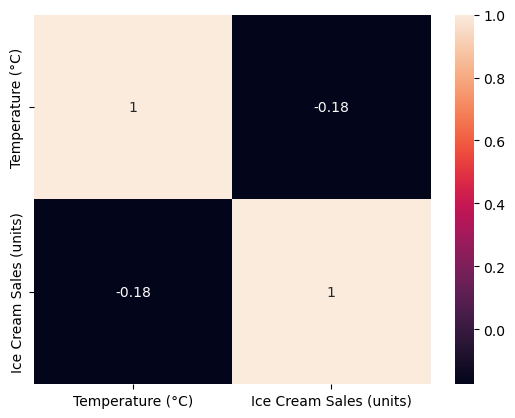

In [8]:
sns.heatmap(correlation,annot=True)

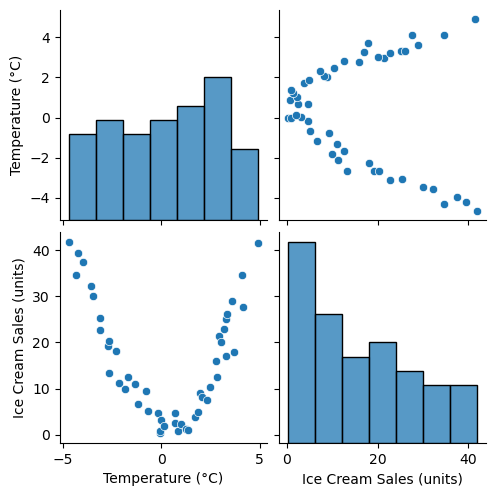

In [35]:
sns.pairplot(df)

In [38]:
X=df.drop("Ice Cream Sales (units)",axis=1)
y = df['Ice Cream Sales (units)'] 

In [13]:
X.head()

,Temperature (°C)
0,-4.662263
1,-4.316559
2,-4.213985
3,-3.949661
4,-3.578554


In [14]:
y.head()

0    41.842986
1    34.661120
2    39.383001
3    37.539845
4    32.284531
Name: Ice Cream Sales (units), dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [40]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [47]:
rmse =  np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nRoot Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Root Mean Squared Error: 3.655170992090627
R-squared: 0.8994543494249359
